## Pandas Visualisation [the reenactment]

this is a "reenactment" of [this](https://pandas.pydata.org/pandas-docs/stable/visualization.html) document on pandas visualisation capabilities and api's - with the difference that now (thanks to pdvega), it is powered by Altair and Vega-Lita under the hood, rather than matplotlib.

**Note:** compared to the matplotlib, though, every plotting function returns a normal `altair.Chart` object - which can be edited, updated, combined, exported, etc;

Below this cell, all text and code is based on the example

We use the standard convention for referencing visualisation api:

In [3]:
import pandas as pd
import numpy as np

import altair as alt
import pdvega

We provide the basics in pandas to easily create decent looking plots. See the ecosystem section for visualization libraries that go beyond the basics documented here.

**Note:** All calls to np.random are seeded with `123456`.


In [4]:
np.random.seed(123456)

## Basic Plotting: plot
We will demonstrate the basics, see the [cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting) for some advanced strategies.

The plot method on Series and DataFrame is just a simple wrapper around `alt.Chart` object, with some data manipulations where neccesary

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

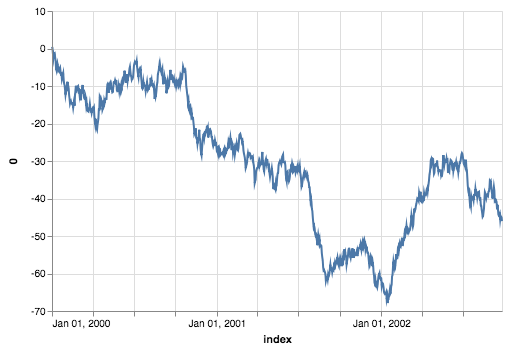

In [6]:
ts.vgplot()

If the index consists of dates, it will try to format the x-axis nicely as per above.

On DataFrame, `plot()` is a convenience to plot all of the columns with labels:

In [24]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

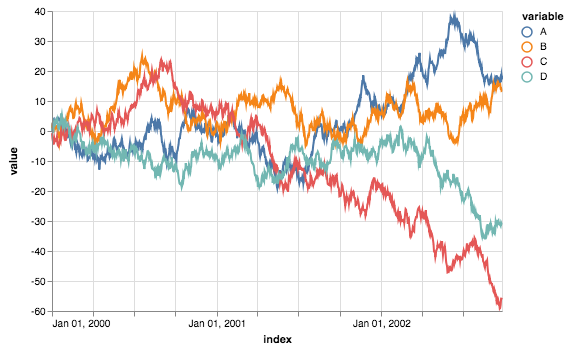

In [13]:
df.vgplot()

In [23]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))

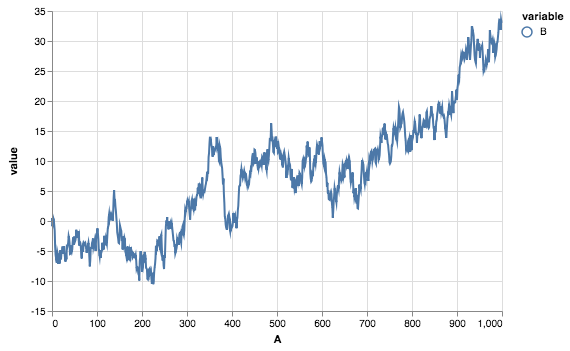

In [15]:
df3.vgplot(x='A', y='B')

  **Note:** For more formatting and styling options, see formatting below.

## Other Plots

Plotting methods allow for a handful of plot styles other than the default line plot.
These methods can be provided as the kind keyword argument to plot(), and include:

- `bar` or `barh` for bar plots
- `hist` for histogram
- `box` for boxplot
- `kde` or `density` for density plots
- `area` for area plots
- `scatter` for scatter plots
- `hexbin` for hexagonal bin plots
- `pie` - Not implemented in Vega and Altair

For example, a `bar` plot can be created the following way:

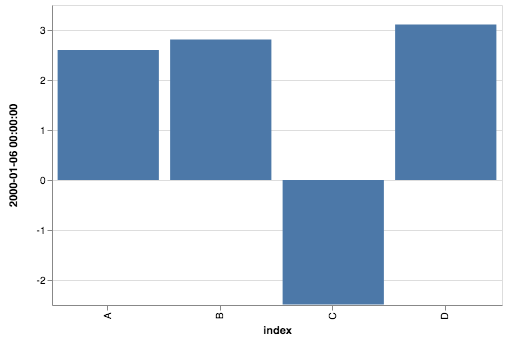

In [16]:
df.iloc[5].vgplot(kind='bar')

You can also create these other plots using the methods DataFrame.plot.<kind> instead of providing the kind keyword argument. This makes it easier to discover plot methods and the specific arguments they use:

In addition to these kinds, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` (not yet implemented) methods, which use a separate interface.

Finally, there are several plotting functions in pdvega.plotting that take a Series or DataFrame as an argument. These include:

- Scatter Matrix
- Andrews Curves
- Parallel Coordinates
- Lag Plot

It does not support yet:
- Autocorrelation Plot
- Bootstrap Plot
- RadViz

At this moment pdvega does not (but vega-lite does) support errorbars and tables;

## Bar plots

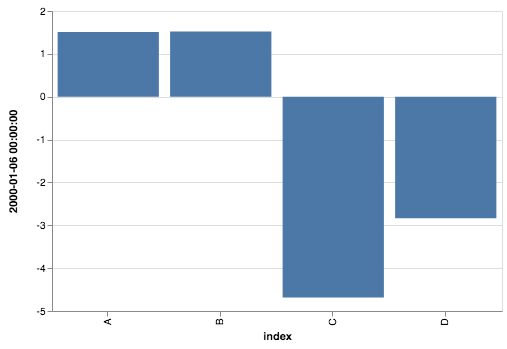

In [25]:
df.iloc[5].vgplot.bar()

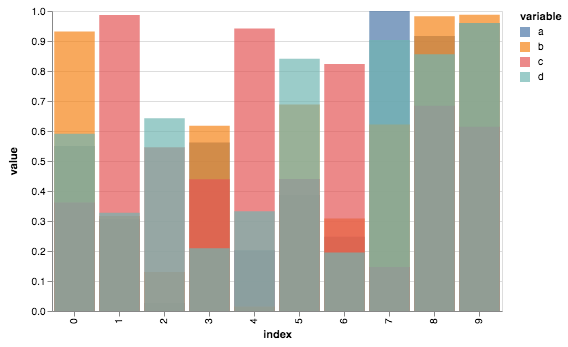

In [27]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.vgplot.bar()

**NOTE:** yes, vgplot does not support side-by-side barplot grouping

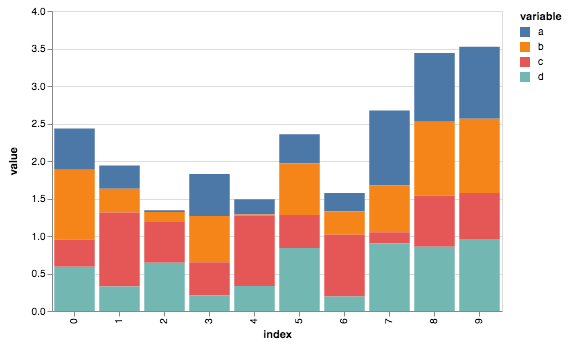

In [29]:
df2.vgplot.bar(stacked=True)

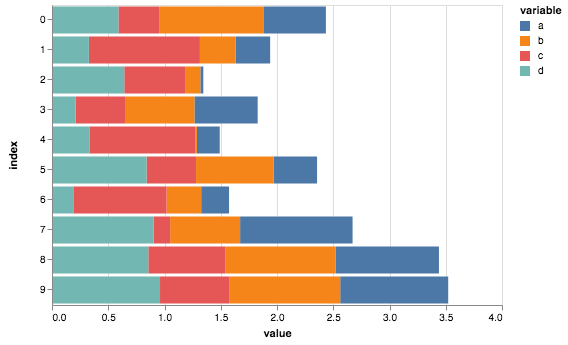

In [30]:
df2.vgplot.barh(stacked=True)

## Histograms

Histograms can be drawn by using the `DataFrame.plot.hist()` and `Series.plot.hist()` methods.

In [32]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

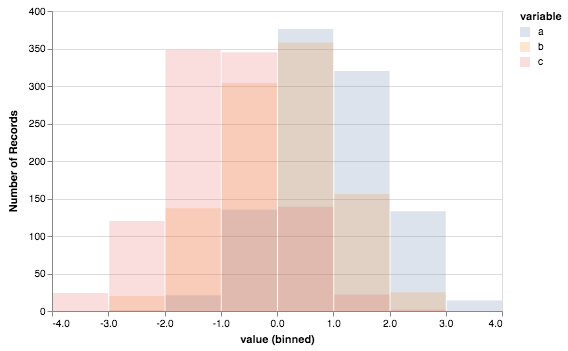

In [34]:
df4.vgplot.hist(alpha=0.2)

A histogram can be stacked using `stacked=True`. Bin size can be changed using the bins keyword.

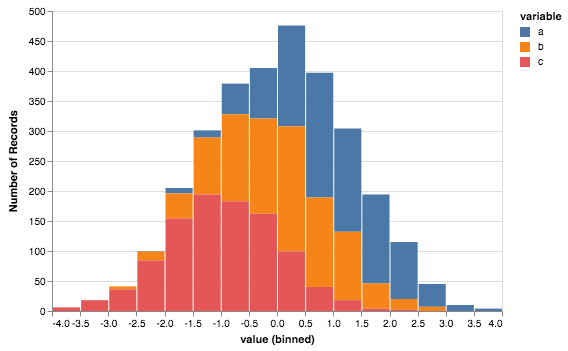

In [35]:
df4.vgplot.hist(stacked=True, bins=20)

**NOTE:** For now, pdvega does not support horizontal and cumulative histograms. We also do not support dataframe multi-subplots histogram and `by` operator. 
With that, all this is totally feasable (and easy to achieve) in altair and will be supported in the future; feel free to PR).

## Boxplots

boxplots are not supported yet and depends on new version of altair to bump to vega-lite 3

## Areas

You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`.
Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.

In [36]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

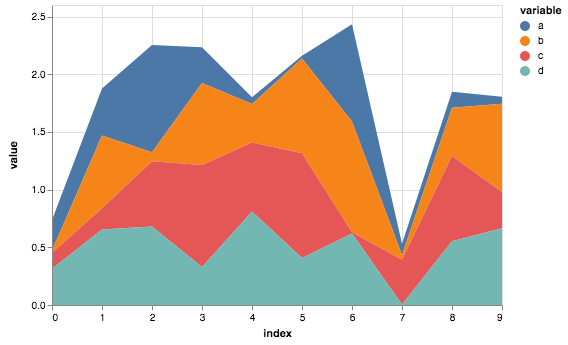

In [38]:
df.vgplot.area()

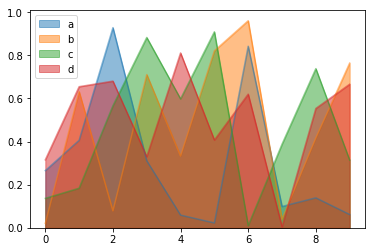

In [39]:
 df.plot.area(stacked=False);

## Scatter Plot

Scatter plot can be drawn by using the DataFrame.vgplot.scatter() method. Scatter plot requires numeric columns for the `x` and `y` axes. These can be specified by the `x` and `y` keywords.

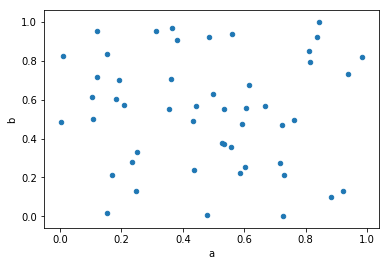

In [40]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

To plot multiple column groups in a single axes, specify column to map to the colors with `c` arguement

In [60]:
df['group']  = np.random.choice(['A', 'B', 'C'], 50)

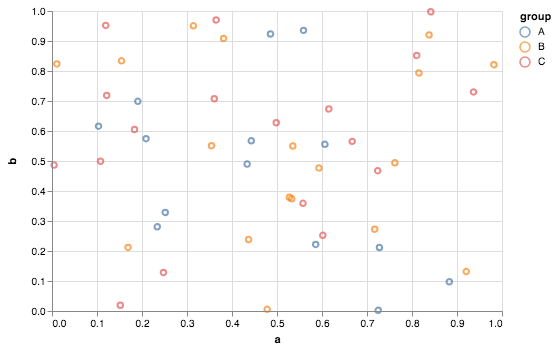

In [61]:
df.vgplot.scatter(x='a', y='b', c='group')

The keyword c may be given as the name of a column to provide colors for each point for quantitative variables as well.
We also support  size with `s` arguement, and will support shape in the future

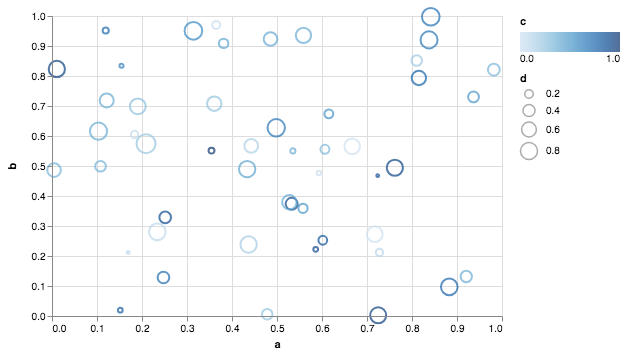

In [63]:
df.vgplot.scatter(x='a', y='b', c='c', s='d')

## Hexagonal Bin Plot

pdvega does not support hexagon bin plots, but can use rectangular ones:

In [70]:
rand = np.random.RandomState(42)
df = pd.DataFrame({'x': np.random.randn(1000),
                   'y': 1 + np.random.randn(1000)})

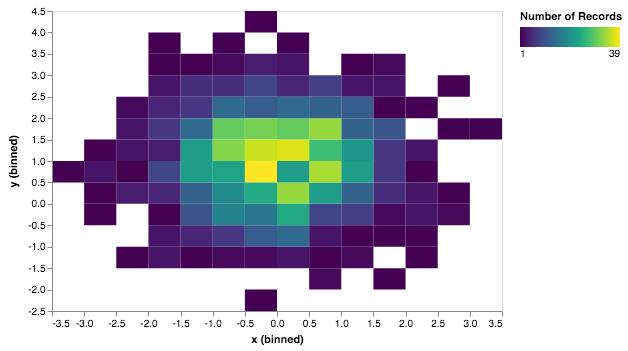

In [71]:
df.vgplot.heatmap(x='x', y='y', gridsize=20)

## Pie plot
vega-lite, thus altair, thus pdvega, does not support pie chart - and most likely, never will

## Plotting Tools

These functions can be imported from `pdvega.plotting` and take a Series or DataFrame as an argument.

### Scatter Matrix Plot

You can create a scatter plot matrix using the scatter_matrix method in pdvega.plotting. it will be **interactive by default**.

In [72]:
from pdvega.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

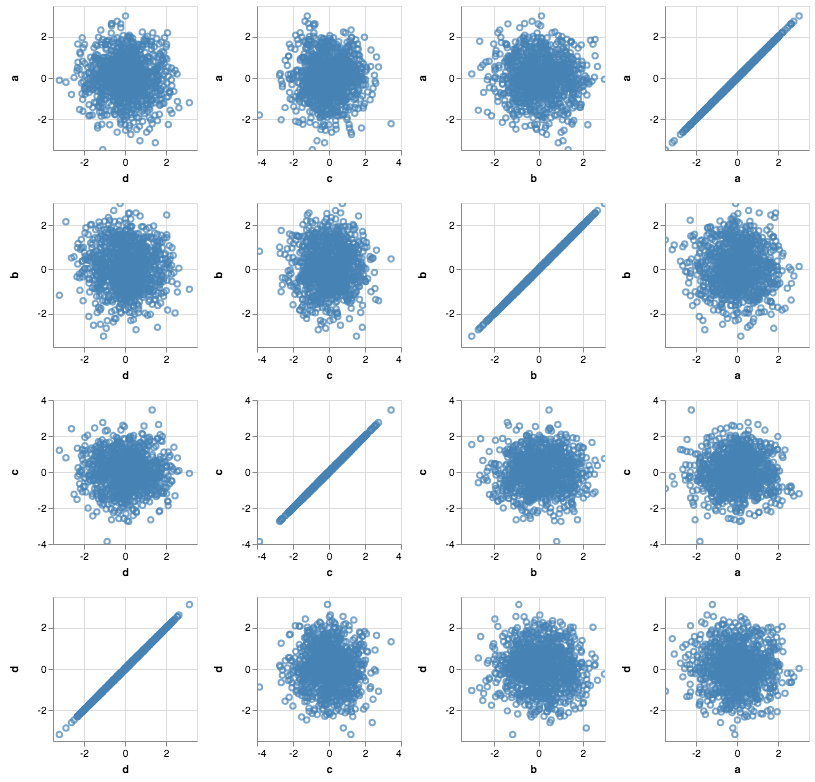

In [77]:
scatter_matrix(df, figsize=(10, 10))

### Density Plot

In [79]:
ser = pd.Series(np.random.randn(1000))

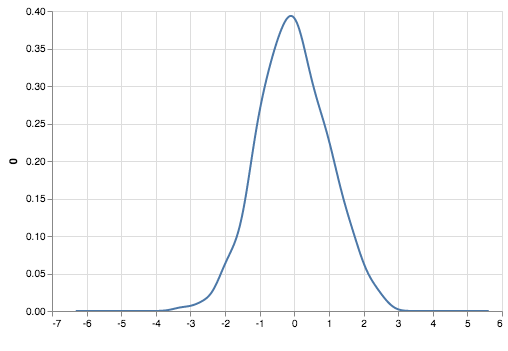

In [80]:
ser.vgplot.kde()

### Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series, see the [Wikipedia entry](https://en.wikipedia.org/wiki/Andrews_plot) for more information. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

**Note:** The “Iris” dataset is available [here](https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv).

In [83]:
from vega_datasets import data
iris = data.iris()

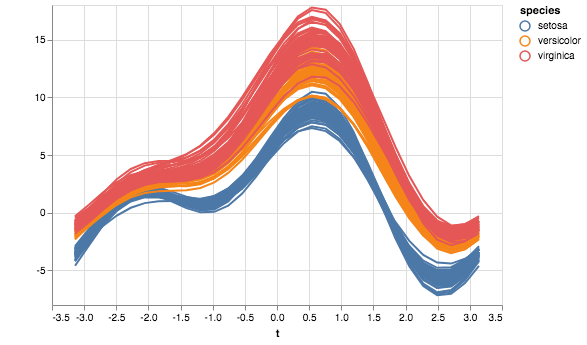

In [85]:
from pdvega.plotting import andrews_curves

andrews_curves(iris, 'species', samples=30)

## Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data, see the [Wikipedia entry](https://en.wikipedia.org/wiki/Parallel_coordinates) for an introduction. Parallel coordinates allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

In [86]:
from pdvega.plotting import parallel_coordinates

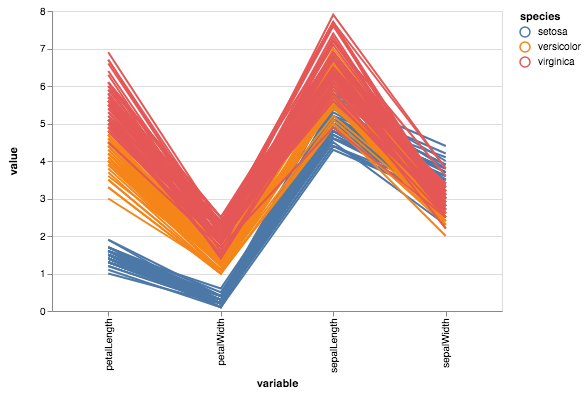

In [88]:
parallel_coordinates(iris, 'species')

### Lag Plot

In [89]:
from pdvega.plotting import lag_plot

In [90]:
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))

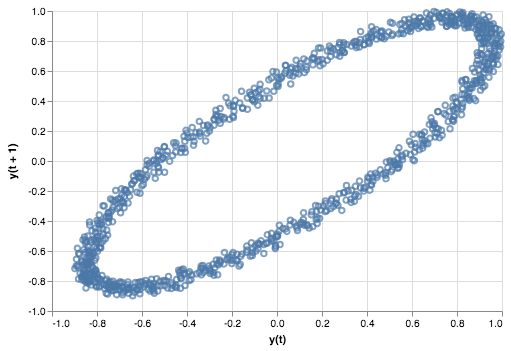

In [91]:
lag_plot(data)

### Autocorrelation Plot

Not supported

### Bootstrap Plot

Not supported

### RadViz

Not supported